In [55]:
import sys
sys.path.append('/Users/aimeebarciauskas/Library/Python/3.6/lib/python/site-packages')
sys.path.append('/Users/aimeebarciauskas/Projects/ifsc/')
import psycopg2
import helpers
import matplotlib.pyplot as plt
from sklearn import linear_model

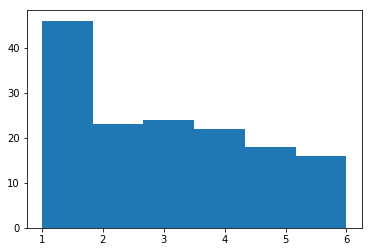

In [61]:
previous_heat_final = helpers.fetch_all(
    'previous_heat',
    'bouldering_comp_results',
    "comp_stage_rank = 1 and comp_stage = 'final'")
previous_heat_final = list(map(lambda row: row[0], previous_heat_final))

plt.hist(previous_heat_final, bins=6)
plt.show()

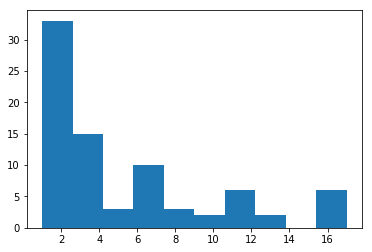

In [63]:
previous_heat_semifinal = helpers.fetch_all(
    'previous_heat',
    'bouldering_comp_results',
    "comp_stage_rank = 1 and comp_stage = 'semifinal' and previous_heat is not NULL")
previous_heat_semifinal = list(map(lambda row: row[0], previous_heat_semifinal))

plt.hist(previous_heat_semifinal)
plt.show()

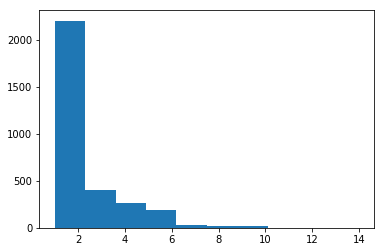

In [64]:
boulder_1_top_tries = helpers.fetch_all(
    'boulder_1_top_tries',
    'bouldering_comp_results',
    'boulder_1_top_tries is not NULL'
)
boulder_1_top_tries = list(map(lambda row: row[0], boulder_1_top_tries))

plt.hist(boulder_1_top_tries)
plt.show()

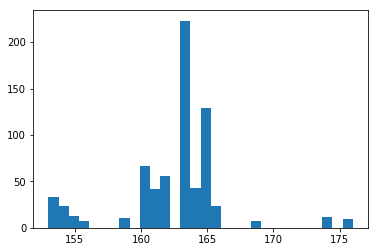

In [71]:
# Heights for all female boulderers
rows = helpers.fetch_all(
    'athletes.height',
    'bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id',
    "athletes.height is not NULL and bouldering_comp_results.category = 'womens_bouldering'")
heights = list(map(lambda row: row[0], rows))

plt.hist(heights, bins=30)
plt.show()

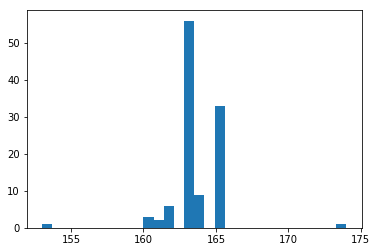

In [77]:
# Heights for female boulderers who finish first
rows = helpers.fetch_all(
    'athletes.height',
    'bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id',
    "athletes.height is not NULL and bouldering_comp_results.category = 'womens_bouldering' and bouldering_comp_results.comp_stage_rank = 1")
heights = list(map(lambda row: row[0], rows))

plt.hist(heights, bins=30)
#plt.xticks(range(155,175))
plt.show()

In [66]:
import numpy as np
rows = helpers.fetch_all(
    'athletes.height, bouldering_comp_results.comp_stage_rank',
    'bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id',
    "athletes.height is not NULL and bouldering_comp_results.category = 'womens_bouldering'")
heights, ranks = zip(*rows)
heights = list(heights)
heights = np.array(heights).reshape(-1, 1)